<a href="https://colab.research.google.com/github/stargalax/KMNIST-DATA/blob/main/kmnistdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import gzip
import os

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# Download KMNIST dataset
def load_kmnist():
    base_url = 'http://codh.rois.ac.jp/kmnist/dataset/kmnist/'
    files = ['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz',
             't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']

    paths = []
    for f in files:
        paths.append(keras.utils.get_file(f, base_url + f, cache_subdir='kmnist'))

    x_train, y_train = load_mnist(os.path.dirname(paths[0]), kind='train')
    x_test, y_test = load_mnist(os.path.dirname(paths[2]), kind='t10k')

    return (x_train, y_train), (x_test, y_test)


18165135/18165135 ━━━━━━━━━━━━━━━━━━━━ 19s 1us/step
29497/29497 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
3041136/3041136 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 54s 123ms/step - accuracy: 0.7659 - loss: 0.7651 - val_accuracy: 0.9522 - val_loss: 0.1551
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 120ms/step - accuracy: 0.9620 - loss: 0.1322 - val_accuracy: 0.9717 - val_loss: 0.0970
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 121ms/step - accuracy: 0.9776 - loss: 0.0746 - val_accuracy: 0.9765 - val_loss: 0.0746
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 79s 115ms/step - accuracy: 0.9857 - loss: 0.0476 - val_accuracy: 0.9783 - val_loss: 0.0752
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 113ms/step - accuracy: 0.9903 - loss: 0.0321 - val_accuracy: 0.9803 - val_loss: 0.0698
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 117ms/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 0.9808 - val_loss: 0.0650
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 112ms/step - accuracy: 0.9962 - loss: 0.0137 - val_accuracy: 0.9850 - val_loss: 0.0656
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 114ms/step - accuracy: 0.9974 - loss: 0

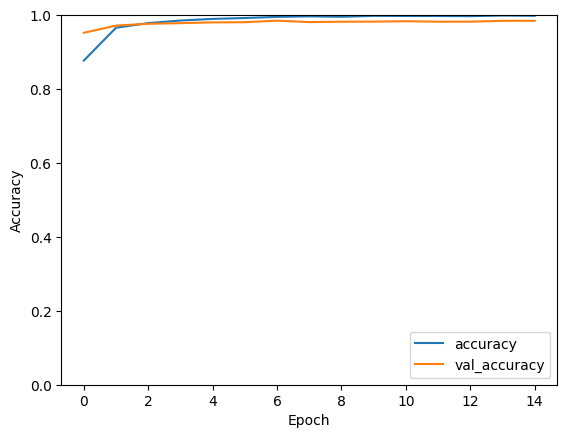

In [ ]:

# Load the Kuzushiji-MNIST dataset
(x_train, y_train), (x_test, y_test) = load_kmnist()

# Normalize the input images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the images to (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define the model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    validation_split=0.1)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

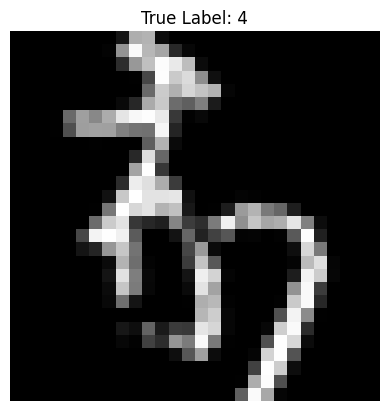

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


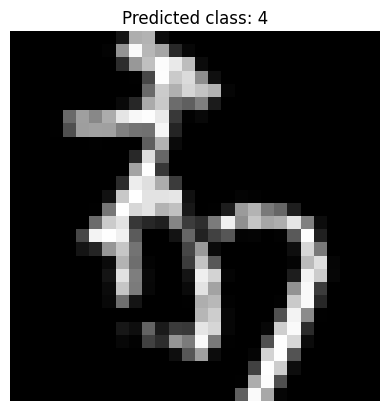

Predicted probabilities: [5.9671072e-07 3.5291843e-13 1.1952680e-12 3.9815782e-09 9.9999940e-01
 1.8777015e-11 5.6185540e-10 2.0030295e-09 4.3287772e-16 2.8608571e-09]
Predicted class: 4


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

# Select a random image from the test set
random_index = random.randint(0, len(x_test) - 1)
test_image = x_test[random_index]
true_label = np.argmax(y_test[random_index])

# Save the image
plt.imsave('chi.png', test_image.reshape(28, 28), cmap='gray')

# Display the image
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}")
plt.axis('off')
plt.show()

# Prediction function
def predict_image(model, image_path):
    # Load and preprocess the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255  # Normalize
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for model input

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Display image and prediction
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted class: {predicted_class}")
    plt.axis('off')
    plt.show()

    print(f"Predicted probabilities: {prediction[0]}")
    print(f"Predicted class: {predicted_class}")

# Now predict on the saved image
predict_image(model, 'chi.png')